# E Commerce data Assignment

### Import Required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Read the csv file

In [2]:
data = pd.read_csv("E-com_Data.csv")
data.head()

C:\Users\Manisha\AppData\Local\Temp\ipykernel_16748\1686181277.py:1: DtypeWarning: Columns (9,10) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("E-com_Data.csv")


,CustomerID,Item Code,InvoieNo,Date of purchase,Quantity,Time,price per Unit,Price,Shipping Location,Cancelled_status,Reason of return,Sold as set
0,4355.0,15734,398177.0,29-10-2017,6.0,3:36:00 PM,321.0,1926.0,Location 1,NaN,NaN,NaN
1,4352.0,14616,394422.0,05-10-2017,2.0,2:53:00 PM,870.0,1740.0,Location 1,NaN,NaN,NaN
2,4352.0,14614,394422.0,12-10-2017,2.0,2:53:00 PM,933.0,1866.0,Location 1,NaN,NaN,NaN
3,4352.0,85014B,388633.0,22-08-2017,3.0,2:47:00 PM,623.0,1869.0,Location 1,NaN,NaN,NaN
4,4352.0,15364,394422.0,10-10-2017,2.0,2:53:00 PM,944.0,1888.0,Location 1,NaN,NaN,NaN


### Check the shape of the data
- 5 lack 41k rows and 12 columns are present in the dataset

In [3]:
data.shape

(541116, 12)

### Check the information about the data

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541116 entries, 0 to 541115
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   CustomerID         404189 non-null  float64
 1   Item Code          537979 non-null  object 
 2   InvoieNo           537979 non-null  float64
 3   Date of purchase   537979 non-null  object 
 4   Quantity           537979 non-null  float64
 5   Time               537979 non-null  object 
 6   price per Unit     537979 non-null  float64
 7   Price              537979 non-null  float64
 8   Shipping Location  537979 non-null  object 
 9   Cancelled_status   8345 non-null    object 
 10  Reason of return   3 non-null       object 
 11  Sold as set        0 non-null       float64
dtypes: float64(6), object(6)
memory usage: 49.5+ MB


### Check the duplicates 
- 3145 duplicate values are present in the data


In [5]:
data.duplicated().sum()

3145

### Drop Duplicated values
- In order to reduce data redundancy and insure data integrity removing duplicate values are necessary

In [6]:
data.drop_duplicates(inplace=True)

### Check duplicates values 
- Verify the removal of duplicate entries by rechecking the dataset to ensure the operation was successfully completed.

In [7]:
data.duplicated().sum()

0

### Check null values
- Cancelled_status, Reason of return, Sold as set these columns contain null values above 90 percent
- removing above features
- CustomerID contains 25 percent null values
- droping null vaues and keeping the customerid feature since it is important for the model building
- and rest of the columns has each null values
- simply dropping these null values

In [8]:
print(data.isna().sum())
print("-"*50)
print("Null values in percent")
data.isna().sum()/len(data)*100

CustomerID           133790
Item Code                 1
InvoieNo                  1
Date of purchase          1
Quantity                  1
Time                      1
price per Unit            1
Price                     1
Shipping Location         1
Cancelled_status     529626
Reason of return     537968
Sold as set          537971
dtype: int64
--------------------------------------------------
Null values in percent


CustomerID            24.869370
Item Code              0.000186
InvoieNo               0.000186
Date of purchase       0.000186
Quantity               0.000186
Time                   0.000186
price per Unit         0.000186
Price                  0.000186
Shipping Location      0.000186
Cancelled_status      98.448801
Reason of return      99.999442
Sold as set          100.000000
dtype: float64

In [9]:
data["Time"]=data["Time"].str[:-2]
data["date"]=data["Date of purchase"]+" "+data["Time"]

In [10]:
data.drop(columns=["Cancelled_status","Reason of return","Sold as set","Date of purchase","Time"], inplace=True)

In [11]:
data.dropna(inplace=True)

### Cross checking null values
- Successfully dealth with the null values

In [12]:
data.isna().sum()

CustomerID           0
Item Code            0
InvoieNo             0
Quantity             0
price per Unit       0
Price                0
Shipping Location    0
date                 0
dtype: int64

### Changing the data types of features

In [13]:
data["CustomerID"]=data["CustomerID"].astype(int)
data["InvoieNo"]=data["InvoieNo"].astype(int)
data["Quantity"]=data["Quantity"].astype(int)
data["price per Unit"]=data["price per Unit"].astype(int)
data["Price"]=data["Price"].astype(int)
data["date"]=pd.to_datetime(data["date"])

C:\Users\Manisha\AppData\Local\Temp\ipykernel_16748\4111502700.py:6: UserWarning: Parsing dates in %d-%m-%Y %H:%M:%S  format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data["date"]=pd.to_datetime(data["date"])


- In Quanity feature there are some negative quantities which can lead to wrong analysis 
- so it is better not to consider those values

In [14]:
new_data=data[data["Quantity"] > 0]

In [15]:
# Getting total price from price and price per unit feature as total price
new_data["total_price"]=new_data["Price"]*new_data["price per Unit"]

C:\Users\Manisha\AppData\Local\Temp\ipykernel_16748\3965493294.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data["total_price"]=new_data["Price"]*new_data["price per Unit"]


In [16]:
new_data.head()

,CustomerID,Item Code,InvoieNo,Quantity,price per Unit,Price,Shipping Location,date,total_price
0,4355,15734,398177,6,321,1926,Location 1,2017-10-29 03:36:00,618246
1,4352,14616,394422,2,870,1740,Location 1,2017-10-05 02:53:00,1513800
2,4352,14614,394422,2,933,1866,Location 1,2017-10-12 02:53:00,1740978
3,4352,85014B,388633,3,623,1869,Location 1,2017-08-22 02:47:00,1164387
4,4352,15364,394422,2,944,1888,Location 1,2017-10-10 02:53:00,1782272


In [17]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 395998 entries, 0 to 537949
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   CustomerID         395998 non-null  int32         
 1   Item Code          395998 non-null  object        
 2   InvoieNo           395998 non-null  int32         
 3   Quantity           395998 non-null  int32         
 4   price per Unit     395998 non-null  int32         
 5   Price              395998 non-null  int32         
 6   Shipping Location  395998 non-null  object        
 7   date               395998 non-null  datetime64[ns]
 8   total_price        395998 non-null  int32         
dtypes: datetime64[ns](1), int32(6), object(2)
memory usage: 21.1+ MB


### Univariate Analysis
#### Numerical Features

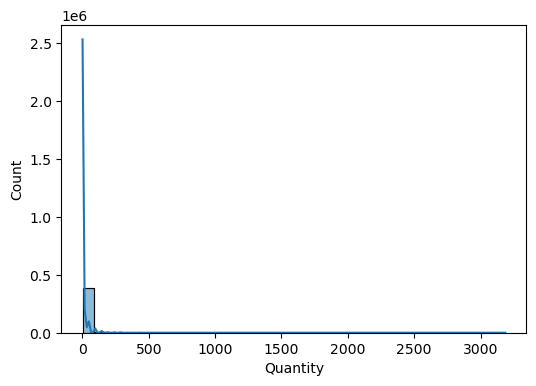

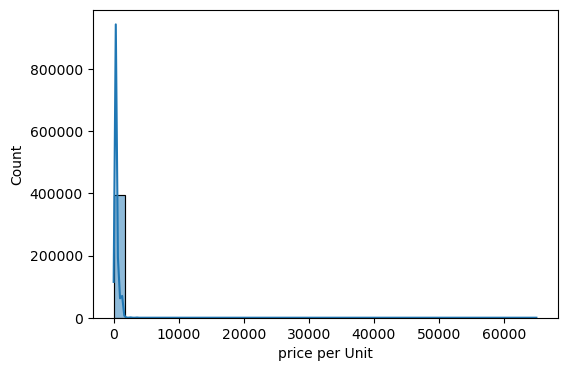

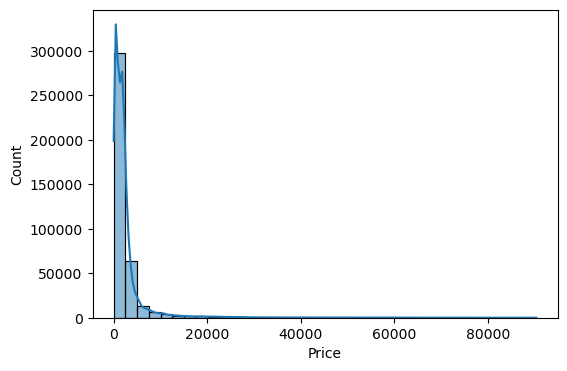

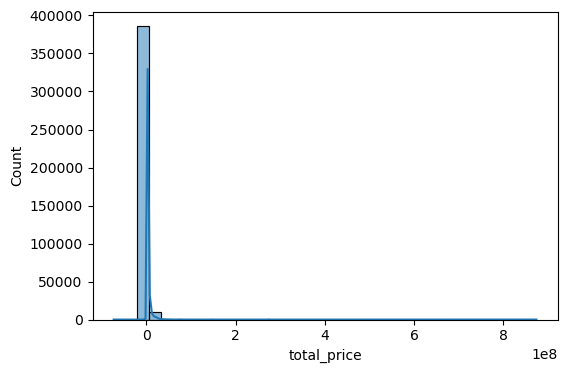

In [18]:
cols=["Quantity","price per Unit","Price","total_price"]
for i in cols:
    plt.figure(figsize=(6,4))
    sns.histplot(new_data[i], kde=True, bins=36)

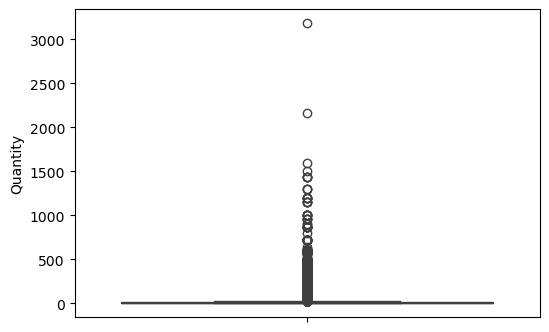

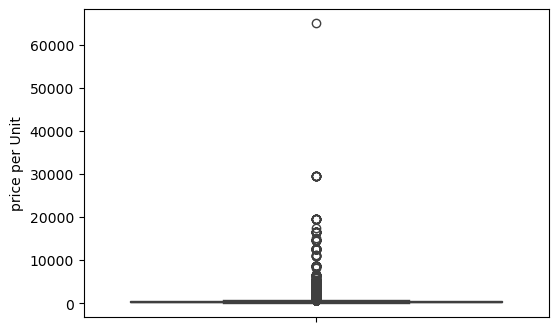

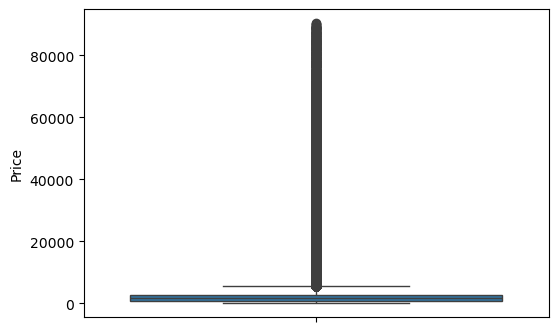

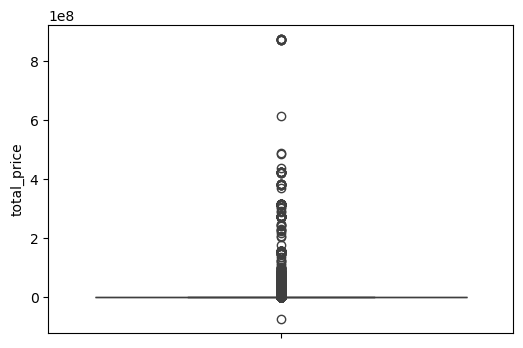

In [19]:
cols=["Quantity","price per Unit","Price","total_price"]
for i in cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(new_data[i])

### Outliers
- Replacing outliers with the median can help improve model performance by reducing the impact of extreme values."

In [20]:
cols=["Quantity","price per Unit","Price","total_price"]
for i in cols:
    q1 = new_data[i].quantile(0.25)
    q3 = new_data[i].quantile(0.75)
    iqr = q3-q1
    upper = q3+(1.5*iqr)
    lower = q1-(1.5*iqr)
    print(i,len(new_data[(new_data[i]<lower) | (new_data[i]>upper)]))
    new_data.loc[(new_data[i]<lower) | (new_data[i]>upper),i]=new_data[i].median()
    print(i,len(new_data[(new_data[i]<lower) | (new_data[i]>upper)]))

Quantity 25121
Quantity 0
price per Unit 34234
price per Unit 0
Price 31146
Price 0
total_price 37461
total_price 0


### Univariate analysis after dealing with outliers

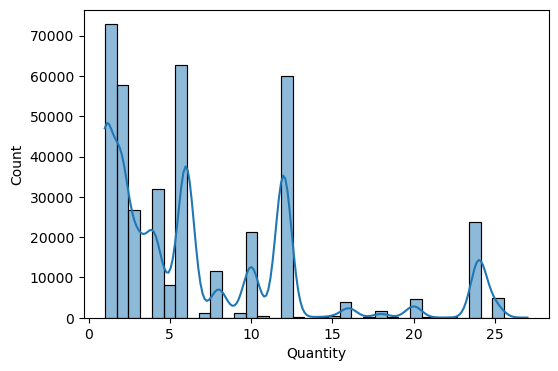

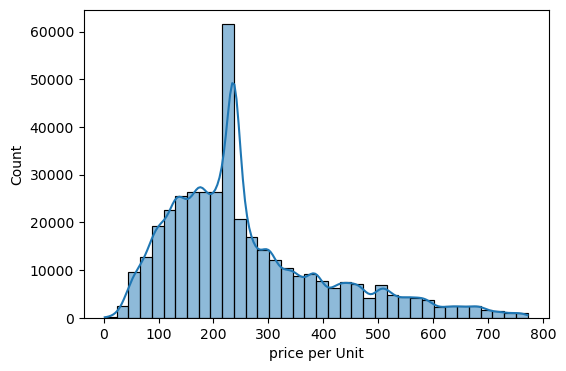

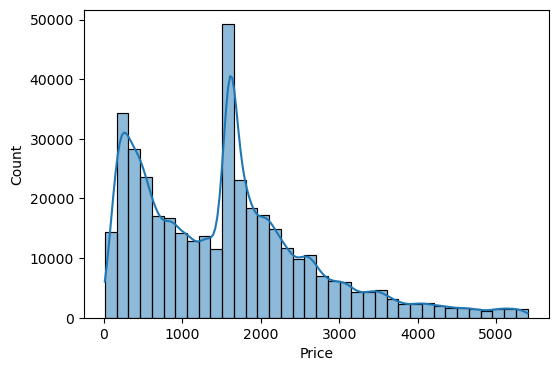

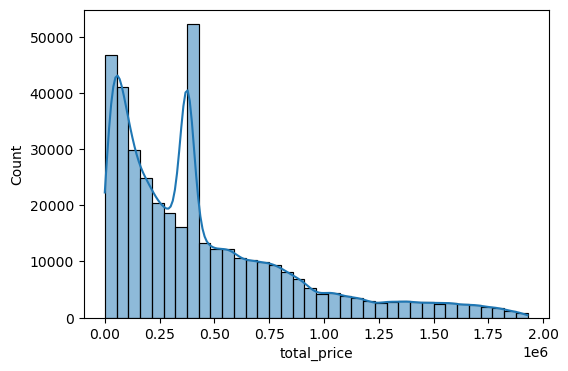

In [21]:
cols=["Quantity","price per Unit","Price","total_price"]
for i in cols:
    plt.figure(figsize=(6,4))
    sns.histplot(new_data[i], bins=36, kde=True)
    plt.show()

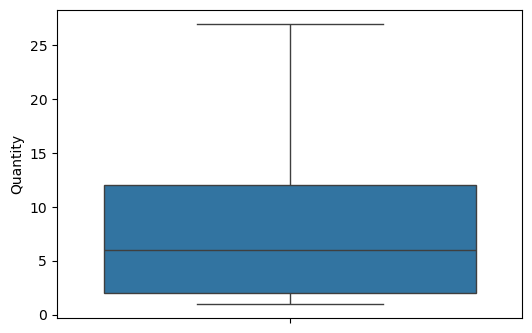

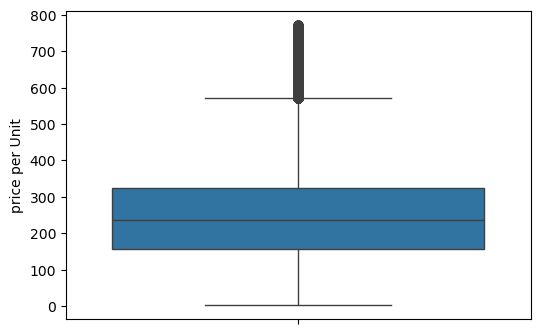

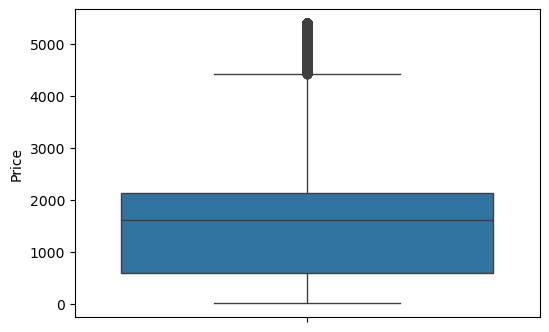

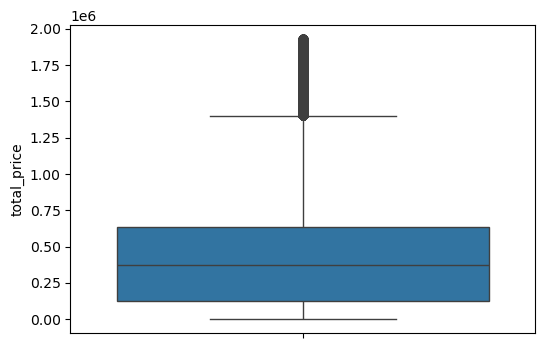

In [22]:
cols=["Quantity","price per Unit","Price","total_price"]
for i in cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(new_data[i])

### Find shortest and longest date

In [23]:
new_data["date"].min()

Timestamp('2016-12-02 01:04:00')

In [24]:
# Snapshot date
new_data["date"].max()

Timestamp('2017-12-19 12:50:00')

### Creating Recency feature

In [25]:
new_data["recency"]=new_data["date"].max() - new_data["date"]

C:\Users\Manisha\AppData\Local\Temp\ipykernel_16748\1958115414.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data["recency"]=new_data["date"].max() - new_data["date"]


In [26]:
new_data["CustomerID"].nunique()

4324

In [27]:
# For each customer, find their most recent purchase date
cust_purchase=new_data.groupby("CustomerID")["date"].min()
cust_purchase=cust_purchase.reset_index()
cust_purchase

,CustomerID,date
0,2,2016-12-08 02:57:00
1,3,2016-12-19 07:09:00
2,4,2017-11-22 09:51:00
3,5,2017-02-03 04:01:00
4,6,2017-02-17 12:33:00
...,...,...
4319,4368,2017-03-08 09:52:00
4320,4369,2017-06-16 10:53:00
4321,4370,2017-08-06 01:35:00
4322,4371,2017-01-07 02:14:00


In [28]:
# Calculate the number of days between the snapshot date and the 
# customer's last purchase date. (Lower value = More Recent).
cust_purchase_lastdate=new_data.groupby("CustomerID")["date"].max()
cust_purchase_lastdate=cust_purchase_lastdate.reset_index()
cust_purchase_lastdate["days"]=data["date"].max() - cust_purchase_lastdate["date"]

In [29]:
cust_purchase_lastdate["recency"]=cust_purchase_lastdate["days"].dt.days

In [30]:
cust_purchase_lastdate.sort_values(by="recency")
recency_dataframe=cust_purchase_lastdate[["CustomerID","recency"]]

In [31]:
cust_purchase_lastdate.head()

,CustomerID,date,days,recency
0,2,2017-12-16 03:52:00,3 days 08:58:00,3
1,3,2017-10-04 01:13:00,76 days 11:37:00,76
2,4,2017-12-01 09:51:00,18 days 02:59:00,18
3,5,2017-02-12 04:01:00,310 days 08:49:00,310
4,6,2017-11-13 02:37:00,36 days 10:13:00,36


### Frequency

In [32]:
#  For each customer, count the total number of unique valid (non-cancelled) 
# transactions (invoices). (Higher value = More Frequent). 
cust_unique_transactions = new_data.groupby("CustomerID")["InvoieNo"].count()
cust_unique_transactions = cust_unique_transactions.reset_index()
cust_unique_transactions.columns=["CustomerID","freq"]
cust_unique_transactions.sort_values(by="freq", ascending=False).head()

,CustomerID,freq
3999,4043,7837
1877,1896,5674
1287,1301,5095
325,331,4580
1659,1675,2698


### Monetory Value

In [33]:
# For each customer, sum the total amount spent across all their valid (noncancelled) transactions. 
# (Higher value = Higher Monetary Value). 
total_amount_spent = new_data.groupby("CustomerID")["total_price"].sum()
total_amount_spent=total_amount_spent.reset_index()
total_amount_spent.columns=["CustomerID","monetory_value"]
total_amount_spent.sort_values(by="monetory_value", ascending=False).head()

,CustomerID,monetory_value
1877,1896,3590801360
1287,1301,1937532150
3999,4043,1585357156
1687,1704,1088244317
561,569,1072978004


### Final  RFM DataFrame

In [34]:
freq_monetory = pd.merge(total_amount_spent,cust_unique_transactions, on="CustomerID",how="inner")
freq_monetory_recency = pd.merge(freq_monetory,recency_dataframe, on="CustomerID",how="inner")
freq_monetory_recency

,CustomerID,monetory_value,freq,recency
0,2,113432381,182,3
1,3,19997016,27,76
2,4,47709633,72,18
3,5,9453108,16,310
4,6,57168296,77,36
...,...,...,...,...
4319,4368,7196671,10,277
4320,4369,2050272,7,180
4321,4370,9801623,12,8
4322,4371,68247486,754,3


### R score F score Monetory score RFM Score

In [35]:
freq_monetory_recency['R_Score'] = pd.qcut(freq_monetory_recency['recency'], 5, labels=[5, 4, 3, 2, 1]).astype(int)
freq_monetory_recency['F_Score'] = pd.qcut(freq_monetory_recency['freq'].rank(method='first'), 5, labels=[1, 2, 3, 4, 5]).astype(int)
freq_monetory_recency['monetory_Score'] = pd.qcut(freq_monetory_recency['monetory_value'], 5, labels=[1, 2, 3, 4, 5]).astype(int)

In [36]:
freq_monetory_recency['RFM_Total'] = freq_monetory_recency[['R_Score', 'F_Score', 'monetory_Score']].sum(axis=1)

In [37]:
freq_monetory_recency.head()

,CustomerID,monetory_value,freq,recency,R_Score,F_Score,monetory_Score,RFM_Total
0,2,113432381,182,3,5,5,5,15
1,3,19997016,27,76,2,2,3,7
2,4,47709633,72,18,4,4,4,12
3,5,9453108,16,310,1,2,2,5
4,6,57168296,77,36,3,4,5,12


### Create segment categories feature

In [38]:
for index, row in freq_monetory_recency.iterrows():
    if row["RFM_Total"] > 10:
        freq_monetory_recency.at[index, "segment_cat"] = "Gold"
    elif row["RFM_Total"] > 5:
        freq_monetory_recency.at[index, "segment_cat"] = "Silver"
    else:
        freq_monetory_recency.at[index, "segment_cat"] = "Platinum"

In [39]:
freq_monetory_recency.head()

,CustomerID,monetory_value,freq,recency,R_Score,F_Score,monetory_Score,RFM_Total,segment_cat
0,2,113432381,182,3,5,5,5,15,Gold
1,3,19997016,27,76,2,2,3,7,Silver
2,4,47709633,72,18,4,4,4,12,Gold
3,5,9453108,16,310,1,2,2,5,Platinum
4,6,57168296,77,36,3,4,5,12,Gold


### distribution of segments

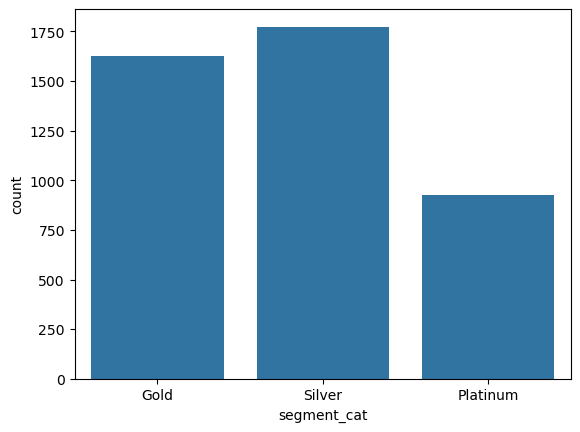

In [40]:
sns.countplot(x=freq_monetory_recency["segment_cat"])
plt.show()

### Model Building

In [41]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.cluster import KMeans
import datetime as dt

In [42]:
x = freq_monetory_recency[["monetory_value","freq","recency"]]

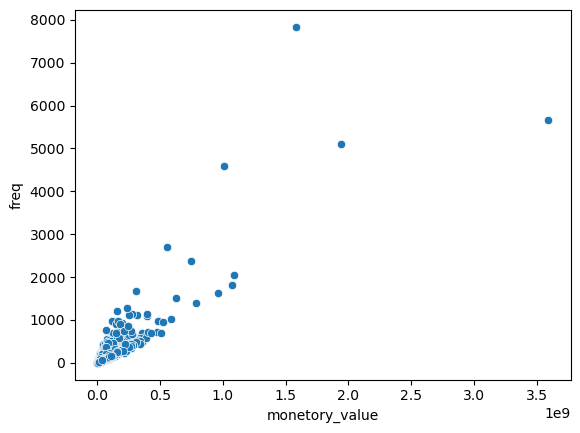

In [43]:
sns.scatterplot(x=x["monetory_value"], y=x["freq"])
plt.show()

<Axes: xlabel='recency', ylabel='freq'>

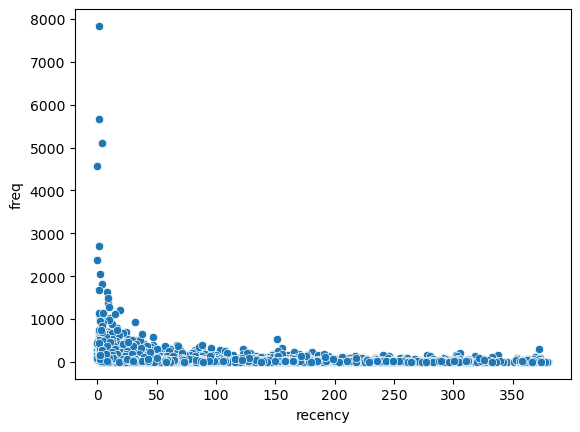

In [44]:
sns.scatterplot(x=x["recency"], y=x["freq"])

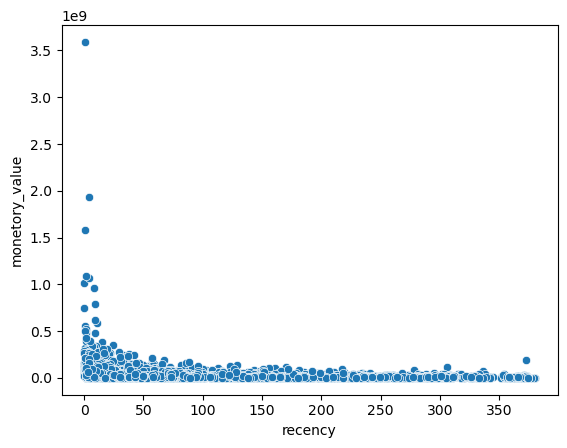

In [45]:
sns.scatterplot(x=x["recency"], y=x["monetory_value"])
plt.show()

In [46]:
scaled = StandardScaler()
x_scaled=scaled.fit_transform(x)
print(x_scaled)

[[ 0.78806599  0.39554755 -0.89638051]
 [-0.23404666 -0.28251951 -0.16717081]
 [ 0.06910854 -0.08566133 -0.7465429 ]
 ...
 [-0.34557659 -0.3481389  -0.84643464]
 [ 0.29377721  2.89783374 -0.89638051]
 [-0.00317374 -0.09441058 -0.49681355]]


In [47]:
wcss = []
for i in range(1,11):
    kmeans_plus = KMeans(n_clusters=i, random_state=30)
    kmeans_plus.fit(x_scaled)
    wcss.append(kmeans_plus.inertia_)

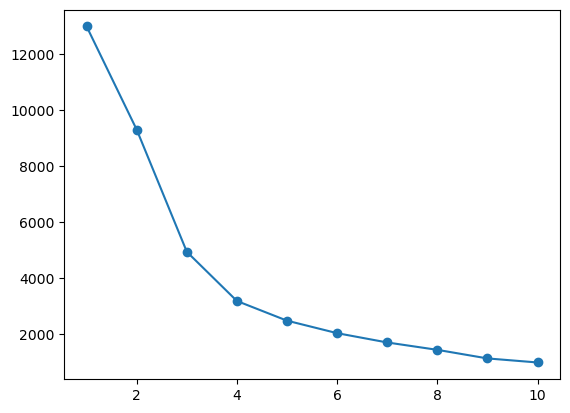

In [48]:
plt.plot(range(1,11), wcss, marker='o')
plt.show()

In [49]:
kmeans_plus = KMeans(n_clusters=3, random_state=42)
kmeans_plus.fit(x_scaled)

KMeans(n_clusters=3, random_state=42)

In [50]:
labels = kmeans_plus.fit_predict(x_scaled)

In [51]:
print(labels)

[1 1 1 ... 1 1 1]


In [52]:
x.columns

Index(['monetory_value', 'freq', 'recency'], dtype='object')

In [53]:
new = pd.DataFrame(x_scaled, columns=x.columns)
new.head()

,monetory_value,freq,recency
0,0.788066,0.395548,-0.896381
1,-0.234047,-0.282520,-0.167171
2,0.069109,-0.085661,-0.746543
3,-0.349389,-0.330640,2.170296
4,0.172579,-0.063788,-0.566738


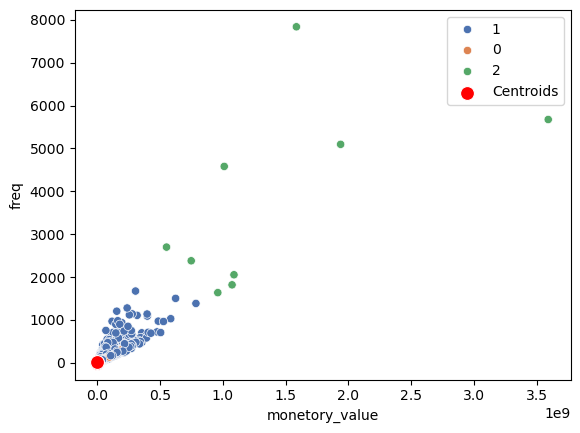

In [54]:
sns.scatterplot(x=x["monetory_value"], y=x["freq"], hue=labels.astype(str), palette="deep")
sns.scatterplot(x=kmeans_plus.cluster_centers_[:,0],y=kmeans_plus.cluster_centers_[:,1],
               color="red",s=100, label="Centroids")
plt.show()

In [55]:
sil_score=silhouette_score(x_scaled, labels)
print(sil_score)

0.5650795350056793


In [56]:
sil_values=silhouette_samples(x_scaled, labels)
sil_values

array([0.56989498, 0.53854288, 0.68986768, ..., 0.65006447, 0.26400009,
       0.67206504])

In [57]:
sil_df=pd.DataFrame({"Cluster":labels, "silhouette":sil_values})
sil_df.head()

,Cluster,silhouette
0,1,0.569895
1,1,0.538543
2,1,0.689868
3,0,0.710948
4,1,0.666549


In [58]:
cluster_sil_score=sil_df.groupby("Cluster")["silhouette"].mean()
cluster_sil_score

Cluster
0    0.593370
1    0.556566
2    0.173263
Name: silhouette, dtype: float64

## PCA

In [59]:
pca=PCA()
x_pca_full=pca.fit_transform(x_scaled)

In [60]:
print(pca.explained_variance_ratio_)
print(np.cumsum(pca.explained_variance_ratio_))

[0.65785604 0.30137214 0.04077182]
[0.65785604 0.95922818 1.        ]


In [61]:
pca=PCA(n_components=2)
x_pca2=pca.fit_transform(x_scaled)
x_pca=pd.DataFrame(x_pca2, columns=["pca1","pca2"])

In [62]:
kmeans_plus=KMeans(n_clusters=3, random_state=30)
labels=kmeans_plus.fit_predict(x_pca)

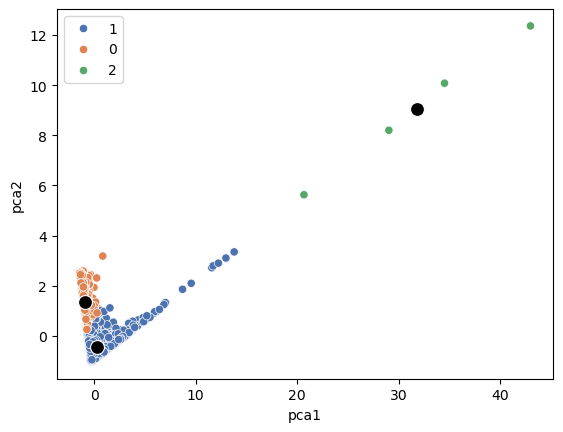

In [63]:
sns.scatterplot(x=x_pca["pca1"],y=x_pca["pca2"], hue=labels.astype(str), palette="deep")

sns.scatterplot(x=kmeans_plus.cluster_centers_[:,0],y=kmeans_plus.cluster_centers_[:,1],
               s=100, color="black")
plt.show()

In [64]:
kmeans_pca=KMeans(n_clusters=3, random_state=30)
labels_pca=kmeans_pca.fit_predict(x_pca)

In [65]:
sil_score_pca=silhouette_score(x_pca, labels_pca)
print(sil_score_pca)

0.5708693548778667


In [66]:
sil_values_pca=silhouette_samples(x_pca, labels_pca)
sil_values_pca

array([0.58260888, 0.53796977, 0.69709829, ..., 0.64917766, 0.36138077,
       0.6762122 ])

In [67]:
sil_df1=pd.DataFrame({"Cluster":labels_pca, "silhouette":sil_values_pca})
sil_df1.head()

,Cluster,silhouette
0,1,0.582609
1,1,0.537970
2,1,0.697098
3,0,0.712606
4,1,0.679685


In [68]:
cluster_sil_score=sil_df1.groupby("Cluster")["silhouette"].mean()
cluster_sil_score

Cluster
0    0.597244
1    0.561900
2    0.582350
Name: silhouette, dtype: float64